In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [43]:
df=pd.read_csv('iris.csv')

In [44]:
features=df.columns[:-1]

In [45]:
target=df.columns[-1]

In [46]:
lab=set(df[target])

In [47]:
df.sample()

,Sepal-length,Sepal-width,Petal-length,Petal-width,Species
38,4.4,3.0,1.3,0.2,setosa


In [48]:
n_clusters=3

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
df[target]=le.fit_transform(df[target])

In [52]:
def calculateDistance(X,y,n_clusters=3):

    lis=[]
    # Plot the distances
    for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
        avg_dist = np.zeros((n_clusters, n_clusters))
        plt.figure(figsize=(5, 4.5))
        for i in range(n_clusters):
            for j in range(n_clusters):
                avg_dist[i, j] = pairwise_distances(X[y == i], X[y == j],
                                                    metric=metric).mean()
        avg_dist /= avg_dist.max()
        lis.append(avg_dist)
    return lis


In [53]:
class Cluster:
    def __init__(self):
        pass
    def __repr__(self):
        return '(%s,%s)' % (self.left, self.right)
    def add(self, clusters, grid, lefti, righti):
        self.left = clusters[lefti]
        self.right = clusters[righti]
        for r in grid:
            r[lefti] = min(r[lefti], r.pop(righti))
        grid[lefti] = list(map(min, list(zip(grid[lefti], grid.pop(righti)))))
        clusters.pop(righti)
        return (clusters, grid)

def agglomerate(labels, grid):
    clusters = labels
    while len(clusters) > 1:
        print(clusters)
        distances = [(1, 0, grid[1][0])]
        for i,row in enumerate(grid[2:]):
            distances += [(i+2, j, c) for j,c in enumerate(row[:i+2])]
        j,i,_ = min(distances, key=lambda x:x[2])
        c = Cluster()
        clusters, grid = c.add(clusters, grid, i, j)
        clusters[i] = c
    return clusters.pop()

In [54]:
def agglomerativeClustering(X,y,n_clusters=3,labels = ('Type 1', 'Type 2', 'Type 3')):

    # Plot the distances
    for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
        avg_dist = np.zeros((n_clusters, n_clusters))
        plt.figure(figsize=(5, 4.5))
        for i in range(n_clusters):
            for j in range(n_clusters):
                avg_dist[i, j] = pairwise_distances(X[y == i], X[y == j],
                                                    metric=metric).mean()
        avg_dist /= avg_dist.max()
        for i in range(n_clusters):
            for j in range(n_clusters):
                plt.text(i, j, '%5.3f' % avg_dist[i, j],
                         verticalalignment='center',
                         horizontalalignment='center')

        plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2,
                   vmin=0)
        plt.xticks(range(n_clusters), labels, rotation=45)
        plt.yticks(range(n_clusters), labels)
        plt.colorbar()
        plt.suptitle("Interclass %s distances" % metric, size=18)
        plt.tight_layout()
    plt.show()

In [55]:
lis=calculateDistance(df[features],df[target])

In [56]:
list(lab)

['setosa', 'virginica', 'versicolor']

In [57]:
temp=["cosine", "euclidean", "cityblock"]

In [58]:
for lisIndex,i in enumerate(lis):
    print('--------For ',temp[lisIndex],'-------')
    agglomerate(list(lab),i.tolist())
    print('------End of ',temp[lisIndex],'-------')
    print()
    print()

--------For  cosine -------
['setosa', 'virginica', 'versicolor']
['setosa', (virginica,versicolor)]
------End of  cosine -------


--------For  euclidean -------
['setosa', 'virginica', 'versicolor']
['setosa', (virginica,versicolor)]
------End of  euclidean -------


--------For  cityblock -------
['setosa', 'virginica', 'versicolor']
['setosa', (virginica,versicolor)]
------End of  cityblock -------




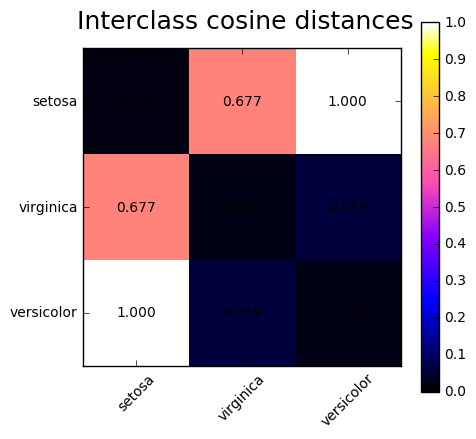

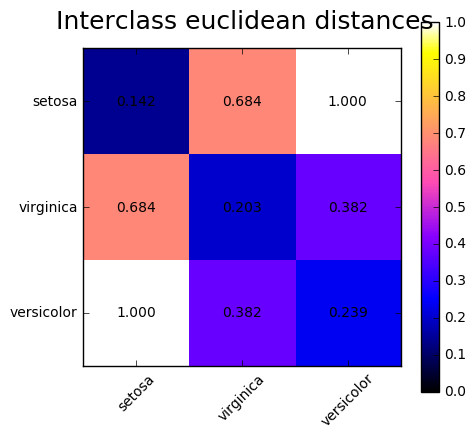

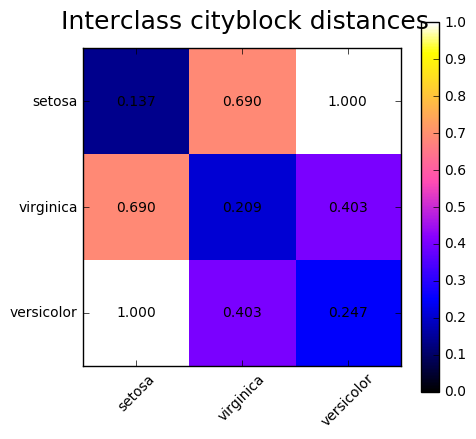

In [59]:
agglomerativeClustering(df[features],df[target],labels=lab)